# Regresión Lineal Simple

Este conjunto de datos ofrece una colección diversa de características de viviendas, que incluyen pies cuadrados, dormitorios, baños, tipos de vecindarios (zonas) y el año de construcción. Con este dataset intentaremos realizar una predicción del precio de una vivienda utilizando regresión lineal simple, luego de una exploración sencilla.

Kaggle: https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data

#### Comprendiendo los datos:

**SquareFee**: superficie en pies cuadrados de la casa

**Bedrooms**: cantidad de cuartos de la casa

**Bathrooms**: cantidad de baños de la casa

**Neighborhood**: zona del barrio donde se encuentra la casa

**YearBuilt**: año de construcción de la casa

**Price**: precio de la casa


#### Importando librerías

In [1]:
# importar los módulos para el análisis de datos: pandas y numpy
import numpy as np  # para cálculos en Python
import pandas as pd # para estructura de datos
import matplotlib.pyplot as plt # visualización
import seaborn as sns

#### Leyendo los datos

In [2]:
# seleccionar la ruta del dataset "housing_price_dataset.csv"
path='.../housing_price_dataset.csv'
casas = pd.read_csv(path, encoding ='utf-8')
print('Datos descargados y leídos con éxito!')

Datos descargados y leídos con éxito!


#### Explorando los datos

In [3]:
# observamos los primeros 10 elementos
casas.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


In [4]:
# observamos los últmos 5 elementos
casas.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


In [5]:
# analizamos la dimensión del df
print(casas.shape)

(50000, 6)


In [6]:
# información general del dataframe
print('Cantidad de Filas y columnas:', casas.shape, '\n')
print('Nombre de las columnas:',casas.columns, '\n')

Cantidad de Filas y columnas: (50000, 6) 

Nombre de las columnas: Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object') 



In [7]:
# cambiar nombre de las columnas
casas.rename(columns={'SquareFeet':'superficie_ft2','Bedrooms':'cuartos', 'Bathrooms':'baños', 'Neighborhood':'zona','YearBuilt':'año_construccion', 'Price':'precio'}, inplace=True)
casas.head()

,superficie_ft2,cuartos,baños,zona,año_construccion,precio
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [8]:
# índices utilizados
casas.index

RangeIndex(start=0, stop=50000, step=1)

#### Analizando los datos

In [9]:
# Mostramos un resumen del df
# Información general de los datos de cada columna
# Indica el número de filas del dataset
# Muestra el número de datos No Nulos por columna (valores válidos)
# Tipo de dato de cada columna
# Tamaño total del dataset
print('Información sobre el dataset:', '\n')
casas.info()

Información sobre el dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   superficie_ft2    50000 non-null  int64  
 1   cuartos           50000 non-null  int64  
 2   baños             50000 non-null  int64  
 3   zona              50000 non-null  object 
 4   año_construccion  50000 non-null  int64  
 5   precio            50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [10]:
# buscar duplicados
casas.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool>

In [11]:
# chequeamos nuevamente
print(casas.isnull().sum())

superficie_ft2      0
cuartos             0
baños               0
zona                0
año_construccion    0
precio              0
dtype: int64


In [12]:
# visualicemos ahora los valores únicos para cada columna
casas.nunique()

superficie_ft2       2000
cuartos                 4
baños                   3
zona                    3
año_construccion       72
precio              50000
dtype: int64

In [13]:
casas

,superficie_ft2,cuartos,baños,zona,año_construccion,precio
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [14]:
# contamos por tipo de datos
numericos = casas.select_dtypes(include=["int", "float"]).shape[1]
objetos = casas.select_dtypes(include=["object"]).shape[1]
print(f"Número de columnas de tipo numérico: {numericos}")
print(f"Número de columnas de tipo objeto: {objetos}")

Número de columnas de tipo numérico: 5
Número de columnas de tipo objeto: 1


In [15]:
# chequeamos los tipos de etiqueta
all(isinstance(column, str) for column in casas.columns)

True

In [16]:
# tipos de datos por columna
print(casas.dtypes)

superficie_ft2        int64
cuartos               int64
baños                 int64
zona                 object
año_construccion      int64
precio              float64
dtype: object


In [17]:
# visualicemos un resúmene estadístico del df
print("\nResúmen estadístico: ")
print(casas.describe())


Resúmen estadístico: 
       superficie_ft2       cuartos         baños  año_construccion  \
count    50000.000000  50000.000000  50000.000000      50000.000000   
mean      2006.374680      3.498700      1.995420       1985.404420   
std        575.513241      1.116326      0.815851         20.719377   
min       1000.000000      2.000000      1.000000       1950.000000   
25%       1513.000000      3.000000      1.000000       1967.000000   
50%       2007.000000      3.000000      2.000000       1985.000000   
75%       2506.000000      4.000000      3.000000       2003.000000   
max       2999.000000      5.000000      3.000000       2021.000000   

              precio  
count   50000.000000  
mean   224827.325151  
std     76141.842966  
min    -36588.165397  
25%    169955.860225  
50%    225052.141166  
75%    279373.630052  
max    492195.259972  


Qué es ese mínimo de precio en negativo?
Tenemos en el df precios en negativo?
Cuántos?

In [18]:
casas

,superficie_ft2,cuartos,baños,zona,año_construccion,precio
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [19]:
# filtrar el df para cuando el precio es menor a 0
casas_filtro = casas[casas['precio'] < 0]
casas_filtro

,superficie_ft2,cuartos,baños,zona,año_construccion,precio
1266,1024,2,2,Urban,2006,-24715.242482
2310,1036,4,1,Suburb,1983,-7550.504574
3630,1235,3,2,Rural,2012,-19871.251146
4162,1352,5,2,Suburb,1977,-10608.359522
5118,1140,4,1,Urban,2020,-23911.003119
5951,1097,4,3,Rural,1981,-4537.418615
6355,1016,5,2,Rural,1997,-13803.684059
8720,1235,3,1,Urban,1952,-24183.000515
9611,1131,3,3,Urban,1959,-13692.026068
10597,1177,2,3,Urban,2010,-434.097124


In [20]:
# cantidad de registros con precio menores a 0
casas_filtro.count()

superficie_ft2      22
cuartos             22
baños               22
zona                22
año_construccion    22
precio              22
dtype: int64

Como son relativamente pocas y para en este caso no tiene sentido que existan precios en negativo, vamos a eliminar los registros que tengan precio negativo, que son 22

In [21]:
# eliminamos los registros con precio menores a 0
casas.drop(casas[(casas['precio'] < 0)].index, inplace=True)
casas

,superficie_ft2,cuartos,baños,zona,año_construccion,precio
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [22]:
casas

,superficie_ft2,cuartos,baños,zona,año_construccion,precio
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


Recordemos que el df origen tenia un total de 50000 registros y 6 columnas.
Después de la eliminación de los registros nos queda en 49978 filas y 6 columnas.

In [23]:
# visualicemos el resúmen estadístico nuevamente
print("\nResúmen estadístico: ")
print(casas.describe())


Resúmen estadístico: 
       superficie_ft2       cuartos         baños  año_construccion  \
count    49978.000000  49978.000000  49978.000000      49978.000000   
mean      2006.752551      3.498659      1.995458       1985.404338   
std        575.350298      1.116325      0.815859         20.718407   
min       1000.000000      2.000000      1.000000       1950.000000   
25%       1514.000000      3.000000      1.000000       1967.000000   
50%       2008.000000      3.000000      2.000000       1985.000000   
75%       2506.000000      4.000000      3.000000       2003.000000   
max       2999.000000      5.000000      3.000000       2021.000000   

              precio  
count   49978.000000  
mean   224931.667960  
std     75995.682992  
min       154.779120  
25%    170007.487130  
50%    225100.123857  
75%    279395.826288  
max    492195.259972  


Me sigue llamando la atención que el precio mínimo. de las viviendas sea tan bajo.
Analicemos el df ordenándolo por precios.

In [24]:
# ordenamos el df por precio para ver mejor los saltos de precios
casas_ordenado = casas.sort_values('precio')
casas_ordenado.head(15)

,superficie_ft2,cuartos,baños,zona,año_construccion,precio
40144,1006,2,1,Suburb,1973,154.779120
17216,1013,2,1,Suburb,2018,276.063516
36235,1112,3,1,Suburb,1978,2360.274450
29980,1005,3,3,Urban,1978,2697.849758
23662,1256,3,1,Rural,1978,3000.859614
27300,1041,4,1,Urban,2002,3926.857020
4537,1102,2,1,Suburb,1967,5796.058628
15131,1178,4,2,Urban,2010,6124.032174
34761,1042,2,2,Urban,2014,6360.211403
46100,1003,3,1,Suburb,1981,7850.236271


Como no tengo contexto ni conocimiento del negocio en particular para este caso, lo vamos a dejar así.

In [25]:
casas

,superficie_ft2,cuartos,baños,zona,año_construccion,precio
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


Analicemos ahora las correlaciones entre las variables

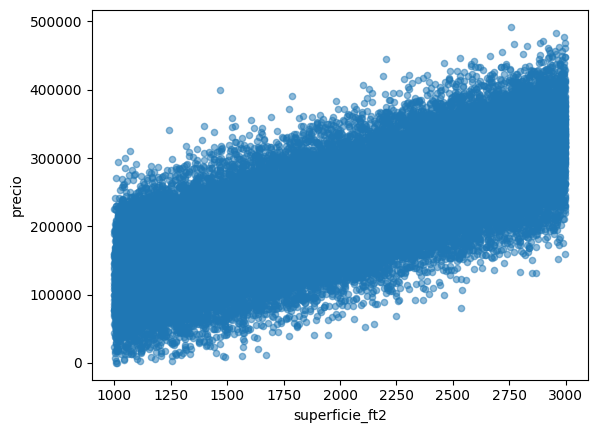

In [26]:
# diagrama de dispersión superficie_ft2/precio:
var = 'superficie_ft2'
casas_por_sueperficie = pd.concat([casas['precio'], casas[var]], axis=1)
casas_por_sueperficie.plot.scatter(x=var, y='precio', alpha = 0.5);

In [27]:
# visualizar la correlación entre las variables de tipo "int64" o "float64":
casas.corr()

<ipython-input-27-94831b8104bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  casas.corr()


,superficie_ft2,cuartos,baños,año_construccion,precio
superficie_ft2,1.000000,-0.002568,-0.003381,0.000468,0.750656
cuartos,-0.002568,1.000000,0.007518,0.003167,0.072918
baños,-0.003381,0.007518,1.000000,0.003815,0.028322
año_construccion,0.000468,0.003167,0.003815,1.000000,-0.002289
precio,0.750656,0.072918,0.028322,-0.002289,1.000000


In [28]:
# correlaciones por orden
corr = casas.corr()
corr[['precio']].sort_values(by = 'precio',ascending = False)\
.style.background_gradient()

<ipython-input-28-93ff267f9dad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = casas.corr()


,precio
precio,1.000000
superficie_ft2,0.750656
cuartos,0.072918
baños,0.028322
año_construccion,-0.002289


Al igual que con el R2, entre más cercano a 1 sea el valor de correlación mejor.

Podríamos decir que existe una buena correlación entre la superficie y el precio de la vivienda

Analicemos también la variable categórica

In [29]:
# tabla de frecuencia relativa de variable zona
100 * casas["zona"].value_counts() / len(casas["zona"])

Suburb    33.446717
Rural     33.350674
Urban     33.202609
Name: zona, dtype: float64

<Axes: xlabel='zona', ylabel='precio'>

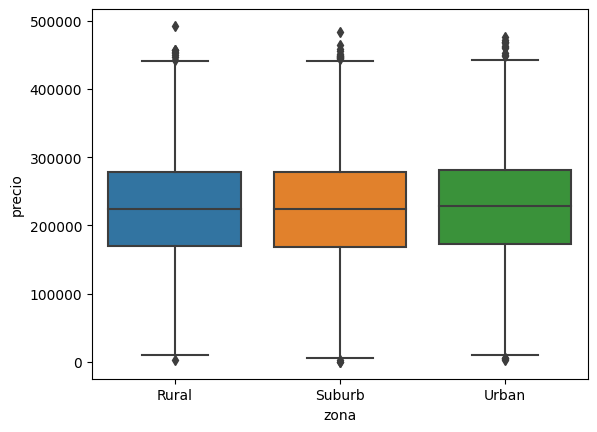

In [30]:
# gráfico de la variable zona y precio
sns.boxplot(x="zona", y="precio", data=casas)

Por el momento para seguir con nuestra Regresiónn Lineal Simple continuaremos con al variable que mejor correlacion tiene: superficie_ft2

#### Definiendo las variables x e y

In [31]:
# Sklearn es la libreria de machine leaarning, utilizaremos su funcion de Regresion lineal
from sklearn.linear_model import LinearRegression

# Definimos como x los valores de la columna que contiene el área de la vivienda en pies cuadrados (variable independiente)
x = casas['superficie_ft2'].values.reshape(-1,1)

# Definimos como y la columna que contiene los precios de las casas (variable dependiente)
y = casas['precio'].values.reshape(-1,1)

#### Creando los conjuntos de datos de entrenamiento y prueba

Dividimos nuestro conjunto de datos en conjuntos de entrenamiento y de prueba. El 80% de todo el conjunto de datos se utilizará para entrenamiento y el 20% para pruebas.

In [32]:
# Sklearn tiene una libreria que nos permite dividir facilmente el dataset
from sklearn.model_selection import train_test_split

# igualamos las variables a los resultados de la funcion train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# con la funcion len podemos ver la cantidad de elementos en cada variable, asi podemos ver como se dividieron los datos en entenamiento y validación
print("Cantidad de valores en conjunto X: ", len(x))
print("Cantidad de valores de X en conjunto entrenamiento: ",len(x_train))
print("Cantidad de valores x en conjunto de validacion: ",len(x_test))
print("Cantidad de valores y en conjunto de entrenamiento: ",len(y_train))
print("Cantidad de valores y en conjunto de validacion: ",len(y_test))

Cantidad de valores en conjunto X:  49978
Cantidad de valores de X en conjunto entrenamiento:  39982
Cantidad de valores x en conjunto de validacion:  9996
Cantidad de valores y en conjunto de entrenamiento:  39982
Cantidad de valores y en conjunto de validacion:  9996


#### Creando y entrenando el modelo

In [33]:
reg = LinearRegression()
reg.fit(x_train,y_train)
# La funcion fit relaciona los valores de x e y, mientras que Linear Regression calcula la recta
# la recta (y = mx + b) obtenida se guarda en la variable reg

LinearRegression()

#### Realizando las predicciones

In [34]:
# predicción de los resultados del conjunto de pruebas (x_test)
y_pred = reg.predict(x_test)

In [35]:
print(y_pred)

[[141732.32070286]
 [133191.00186061]
 [162986.30014754]
 ...
 [196257.71656795]
 [259721.70191912]
 [184836.18555796]]


In [36]:
print(y_test)

[[147698.04397303]
 [134139.6090369 ]
 [126874.8329609 ]
 ...
 [236295.54791318]
 [236481.45247169]
 [171767.97590709]]


#### Comparando valores

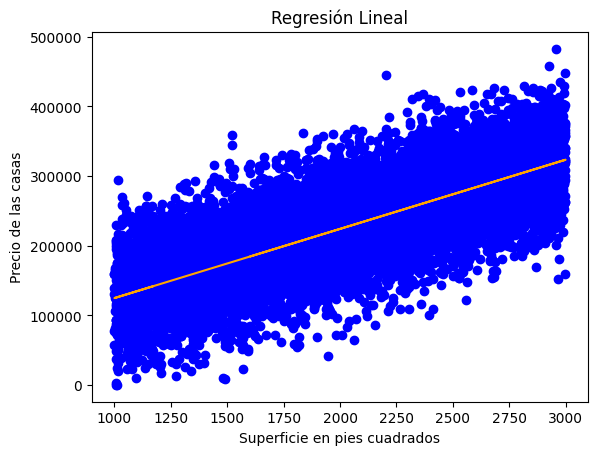

In [37]:
# ahora comparamos y_pred con los valores reales y_test
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, y_pred, color = 'orange')
plt.title('Regresión Lineal')
plt.xlabel('Superficie en pies cuadrados')
plt.ylabel('Precio de las casas')
plt.show()

#### Coeficiente y resultados

Veamos su valor de R2

In [38]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_test, y_pred))

R2-score: 0.56


El valor de R2 obtenido es de 0.5625443053054799, un valor no muy certero, por lo tanto se considera que utilizar solo dos variables no es suficiente para predecir de forma adecuada el valor de las casas. En ciertas situaciones una variable no es suficiente para poder predecir otra, en este caso la superficie de una casa no sería suficiente para predecir de forma precisa el valor de la misma.

Fin...